## Lab 3 Termodinámica y Teoría Cinética 🧑‍🔬 - Calor específico

- Camila Ferrus
- Marcelo Ojeda

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
err_pesa = 0.005
err_termometro = 0.5

### Calcular el Coeficiente para el calorímetro

In [4]:
path_calorimetro = 'datos_ck_calorimetro.csv'
calorimetro = pd.read_csv(filepath_or_buffer=path_calorimetro, sep=';',index_col=0)
calorimetro

,Sigla,Unidad,EXP1,EXP2,EXP3
DATOS CALORIMETRO,,,,,
Masa agua fría,m1,g,94.21,98.51,90.43
Masa agua caliente,m2,g,89.97,92.04,89.65
Temperatura agua fría,T1,°C,17.00,19.00,22.00
Temperatura agua caliente,T2,°C,53.00,66.00,71.00
Temperatura de la mezcla,T3,°C,33.00,40.00,44.00


Sabemos que la cantidad de calor agregada o extraída de un sistema se puede calcular a través de la fórmula:

$$ Q = c \cdot m \cdot \Delta T $$
$$ Q = C \cdot \Delta T $$

Llamamos $C$ al capacidad calorífica de la sustancia, y $c$ al calor específico de la sustancia. El calor específico es la capacidad calorífica por unidad de masa de la sustancia.

$$ c = \frac{C}{m}$$

Luego, en el experimento para determinar la capacidad calorífica del calorímetro, tenemos un equilibrio de calores de la forma:

\begin{align*}
&Q_{ac} + Q_{cal} + Q_{af} = 0 \\
&Q_{ac} = - Q_{cal} - Q_{af}
\end{align*}

Donde:
- $Q_{ac}$: es el calor agregado por el agua caliente.
- $Q_{cal}$: es el calor recibido por el calorímetro.
- $Q_{af}$: es el calor recibido por el agua fría.

Luego:
 $$ c_{agua} \cdot M_{2} \left( T_{3} - T_{2} \right) = - C_{cal} \cdot \left( T_{3} - T_{1} \right) - c_{agua} \cdot M_{1} \cdot \left( T_{3} - T_{1} \right)$$

 Donde $c_{agua} = 1.0 \frac{cal}{g°C}$, y $C_{cal}$ la capacidad calorífica del calorímetro, que es la que queremos calcular. Este parámetro no depende de la masa del calorímetro. Despejando para $C_{cal}$ tenemos que:

 $$C_{cal} = \frac{c_{agua} \cdot \left( M_{2}\left( T_{3} - T_{2} \right) + M_{1}\left( T_{3} - T_{1} \right)\right)}{T_{1} - T_{3}} \left[ \frac{cal}{°C} \right]$$

In [53]:
def c_calorimetro(tabla):
    m1 = tabla.iloc[0]['EXP1':]
    m2 = tabla.iloc[1]['EXP1':]
    t1 = tabla.iloc[2]['EXP1':]
    t2 = tabla.iloc[3]['EXP1':]
    t3 = tabla.iloc[4]['EXP1':]
 
    num_err_t1 = - m1 * (t1 - t3) - (m2 * (t3 - t2) + m1 * (t3 - t1))
    den_err_t1 = (t1 - t3) ** 2
    err_t1 = ((num_err_t1 / den_err_t1) * err_termometro) ** 2
    
    num_err_t2 = - m2
    den_err_t2 = (t1 - t3)
    err_t2 = ((num_err_t2 / den_err_t2) * err_termometro) ** 2

    num_err_t3 = ((m1 + m2) * (t1 - t3)) + m1 * (t3 - t1) + m2 * (t3 - t2)
    den_err_t3 = (t1 - t3) ** 2
    err_t3 = ((num_err_t3 / den_err_t3) * err_termometro) ** 2
    
    err_c = err_t1 + err_t2 + err_t3
    for key in err_c.keys():
        err_c[key] = np.sqrt(err_c[key])

    numerador = (m2 * (t3 - t2)) + (m1 * (t3 - t1))
    denominador = t1 - t3
    c_cal = np.abs(numerador / denominador)

    resultados = {
        'Resultados': [key for key in c_cal.keys()],
        'C_CAL': [c_cal[key] for key in c_cal.keys()],
        'C_CAL_ERR': [err_c[key] for key in err_c.keys()]
    }
    
    resultados = pd.DataFrame(resultados)
    
    return resultados

In [159]:
def c_calorimetro_100(tabla):
    m1_tabla = tabla.iloc[0]['EXP1':]
    m2_tabla = tabla.iloc[1]['EXP1':]
    t1_tabla = tabla.iloc[2]['EXP1':]
    t2_tabla = tabla.iloc[3]['EXP1':]
    t3_tabla = tabla.iloc[4]['EXP1':]
    
    m1 = np.linspace(m1_tabla.min(), m1_tabla.max(), 100)
    m2 = np.linspace(m2_tabla.min(), m2_tabla.max(), 100)
    t1 = np.linspace(t1_tabla.min(), t1_tabla.max(), 100)
    t2 = np.linspace(t2_tabla.min(), t2_tabla.max(), 100)
    t3 = np.linspace(t3_tabla.min(), t3_tabla.max(), 100)
    
    num_err_t1 = - m1 * (t1 - t3) - (m2 * (t3 - t2) + m1 * (t3 - t1))
    den_err_t1 = (t1 - t3) ** 2
    err_t1 = ((num_err_t1 / den_err_t1) * err_termometro) ** 2
    
    num_err_t2 = - m2
    den_err_t2 = (t1 - t3)
    err_t2 = ((num_err_t2 / den_err_t2) * err_termometro) ** 2

    num_err_t3 = ((m1 + m2) * (t1 - t3)) + m1 * (t3 - t1) + m2 * (t3 - t2)
    den_err_t3 = (t1 - t3) ** 2
    err_t3 = ((num_err_t3 / den_err_t3) * err_termometro) ** 2
    
    err_c = np.sqrt(err_t1 + err_t2 + err_t3)

    numerador = (m2 * (t3 - t2)) + (m1 * (t3 - t1))
    denominador = t1 - t3
    c_cal = np.abs(numerador / denominador)
    
    resultados = {
        'Resultados': [i for i in range(100)],
        'C_CAL': c_cal,
        'C_CAL_ERR': err_c
    }
    
    resultados = pd.DataFrame(resultados)
    return resultados

In [160]:
valores_c_calorimetro = c_calorimetro(calorimetro)
valores_c_calorimetro

,Resultados,C_CAL,C_CAL_ERR
0,EXP1,18.252500,7.763681
1,EXP2,15.444286,6.018235
2,EXP3,19.595000,5.567613


In [161]:
valores_c_calorimetro100 = c_calorimetro_100(calorimetro)
valores_c_calorimetro100

,Resultados,C_CAL,C_CAL_ERR
0,0,21.632500,7.736067
1,1,21.552861,7.707837
2,2,21.473419,7.679827
3,3,21.394172,7.652035
4,4,21.315117,7.624457
...,...,...,...
95,95,14.718221,5.775469
96,96,14.650594,5.760485
97,97,14.583046,5.745586
98,98,14.515575,5.730771


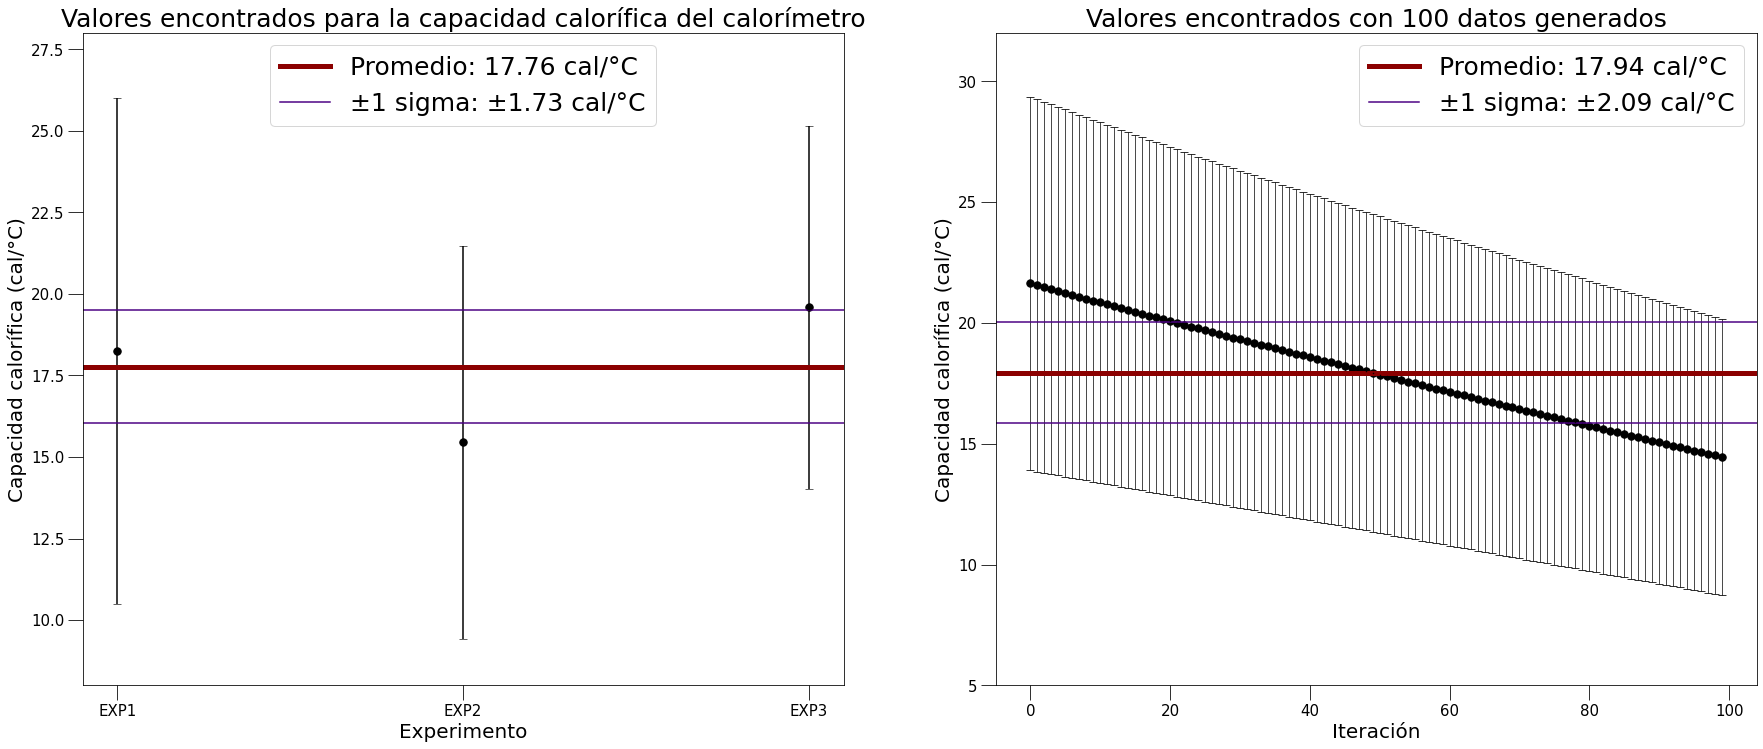

In [201]:
mean_ccal = np.mean(valores_c_calorimetro['C_CAL'])
std_ccal = np.std(valores_c_calorimetro['C_CAL'])
mean_ccal100 = np.mean(valores_c_calorimetro100['C_CAL'])
std_ccal100 = np.std(valores_c_calorimetro100['C_CAL'])


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 12))
ax1.scatter(valores_c_calorimetro['Resultados'], valores_c_calorimetro['C_CAL'], color='black', s=55)
ax1.errorbar(valores_c_calorimetro['Resultados'], valores_c_calorimetro['C_CAL'], yerr = valores_c_calorimetro['C_CAL_ERR'], fmt='.',
            markersize = '10', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6)
ax1.axhline(mean_ccal, color='darkred', label='Promedio: {} cal/°C'.format(np.round(mean_ccal, 2)), linewidth=5)

ax1.axhline(mean_ccal + std_ccal,c='indigo', label='±1 sigma: ±{} cal/°C'.format(
    np.round(std_ccal, 2)
))
ax1.axhline(mean_ccal - std_ccal,c='indigo')


ax1.set_ylim(8,28)
ax1.set_title('Valores encontrados para la capacidad calorífica del calorímetro', fontsize=25)
ax1.set_xlabel('Experimento', fontsize=20)
ax1.set_ylabel('Capacidad calorífica (cal/°C)', fontsize=20)
ax1.tick_params(axis='both', labelsize=15, length=15)
ax1.legend(fontsize=25)

ax2.scatter(valores_c_calorimetro100['Resultados'], valores_c_calorimetro100['C_CAL'], color='black', s=55)
ax2.errorbar(valores_c_calorimetro100['Resultados'], valores_c_calorimetro100['C_CAL'], yerr = valores_c_calorimetro100['C_CAL_ERR'], fmt='.',
            markersize = '1', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.8, elinewidth=0.7)

ax2.axhline(mean_ccal100, color='Darkred', label='Promedio: {} cal/°C'.format(np.round(mean_ccal100, 2)), linewidth=5)

ax2.axhline(mean_ccal100 + std_ccal100,c='indigo', label='±1 sigma: ±{} cal/°C'.format(
    np.round(std_ccal100, 2)
))
ax2.axhline(mean_ccal100 - std_ccal100,c='indigo')


ax2.set_ylim(5,32)
ax2.set_title('Valores encontrados con 100 datos generados', fontsize=25)
ax2.set_xlabel('Iteración', fontsize=20)
ax2.set_ylabel('Capacidad calorífica (cal/°C)', fontsize=20)
ax2.tick_params(axis='both', labelsize=15, length=15)
ax2.legend(fontsize=25)

La unidad es cal/°C porque en el calorímetro la capacidad calórica no depende de la masa.

### Calcular el Coeficiente para el Cobre

\begin{align*}
&Q_{ac} + Q_{cal} + Q_{af} + Q_{Cu}= 0 \\
&Q_{ac} = - Q_{cal} - Q_{af} - Q_{Cu}
\end{align*}

$$c_{Cu} = \frac{c_{agua} \cdot \left( M_{2}\left( T_{3} - T_{2} \right) + M_{1}\left( T_{3} - T_{1} \right)\right) + C_{cal} \left( T_{3} - T_{1} \right)}{m_{Cu}\left( T_{1} - T_{3}\right)} \left[ \frac{cal}{g°C} \right]$$

In [204]:
path_cobre = 'datos_ck_cobre.csv'
cobre = pd.read_csv(filepath_or_buffer=path_cobre, sep=';', index_col=0)
cobre

,Sigla,Unidad,EXP1,EXP2,EXP3
DATOS COBRE,,,,,
Masa agua fría,m1,g,95.51,92.86,92.63
Masa del cobre,mCu,g,95.16,95.16,95.16
Masa agua caliente,m2,g,92.39,98.26,90.41
Temperatura agua fría,T1,°C,20.00,23.00,24.00
Temperatura agua caliente,T2,°C,67.00,63.00,56.00
Temperatura de la mezcla,T3,°C,41.00,42.00,38.00


In [202]:
def c_cobre(tabla, c_cal, c_cal_err):
    m1 = tabla.iloc[0]['EXP1':]
    m_cu = tabla.iloc[1]['EXP1':]
    m2 = tabla.iloc[2]['EXP1':]
    t1 = tabla.iloc[3]['EXP1':]
    t2 = tabla.iloc[4]['EXP1':]
    t3 = tabla.iloc[5]['EXP1':]
    
    num_err_t1 = - m1 * (t1 - t3) - (c_cal * (t3 - t1) + m1 * (t3 - t1) + m2 * (t3 - t2))
    den_err_t1 = m_cu * ((t1 - t3)) ** 2
    err_t1 = ((num_err_t1 / den_err_t1) * err_termometro) ** 2
    
    num_err_t2 = - m2
    den_err_t2 = m_cu * (t1 - t3)
    err_t2 = ((num_err_t2 / den_err_t2) * err_termometro) ** 2
    
    num_err_t3 = (m1 + m2) * (m_cu * (t1 - t3)) + c_cal * (t3 - t1) + m1 * (t3 - t1) + m2 * (t3 - t2)
    den_err_t3 = m_cu * (t1 - t3) ** 2
    err_t3 = ((num_err_t3 / den_err_t3) * err_termometro) ** 2
    
    num_err_ccal = t3 - t1
    den_err_ccal = m_cu * (t1 - t3)
    err_ccal = ((num_err_ccal / den_err_ccal) * c_cal_err) ** 2
    
    err_cu = err_t1 + err_t2 + err_t3 + err_ccal
    for key in err_cu.keys():
        err_cu[key] = np.sqrt(err_cu[key])
    
    n1 = m2 * (t3 - t2)
    n2 = c_cal * (t3 - t1)
    n3 = m1 * (t3 - t1)
    denominador = m_cu * (t1 - t3)
    ccu = np.abs((n1 + n2 + n3) / denominador)

    resultados = {
        'Resultados': [key for key in ccu.keys()],
        'C_CU': [ccu[key] for key in ccu.keys()],
        'C_CU_ERR': [err_cu[key] for key in err_cu.keys()]
    }
    
    resultados = pd.DataFrame(resultados)
    
    return resultados

In [205]:
valores_cobre = c_cobre(cobre, mean_ccal, std_ccal)
valores_cobre

,Resultados,C_CU,C_CU_ERR
0,EXP1,0.011703,4.474250
1,EXP2,0.021236,5.029084
2,EXP3,0.061449,6.539555


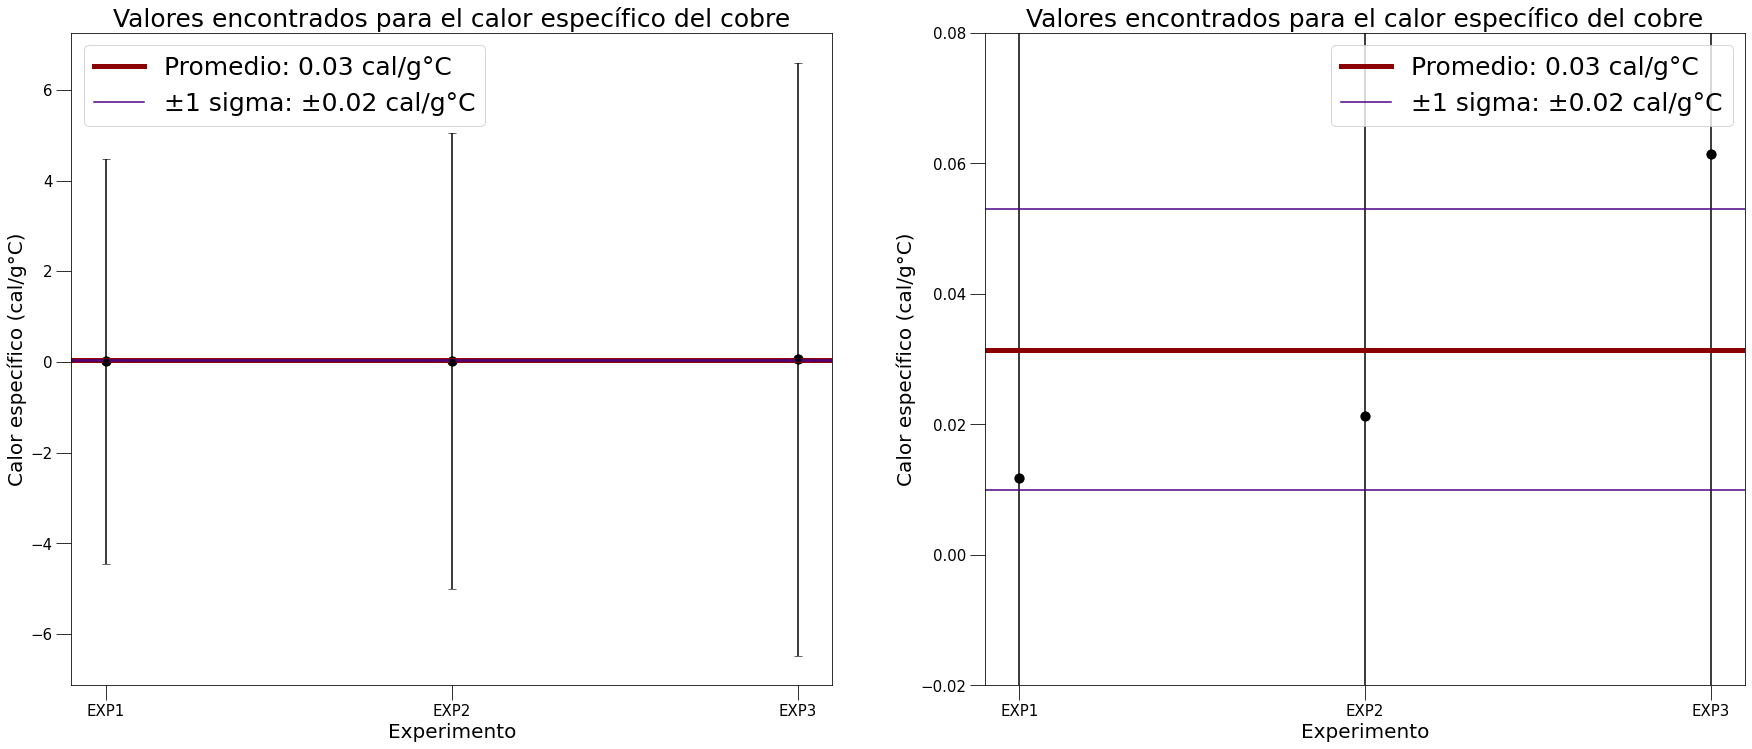

In [214]:
mean_ccu = np.mean(valores_cobre['C_CU'])
std_ccu = np.std(valores_cobre['C_CU'])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30, 12))
ax1.scatter(valores_cobre['Resultados'], valores_cobre['C_CU'], color='black', s=85)
ax1.errorbar(valores_cobre['Resultados'], valores_cobre['C_CU'], yerr = valores_cobre['C_CU_ERR'], fmt='.',
            markersize = '10', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6)
ax1.axhline(mean_ccu, color='darkred', label='Promedio: {} cal/g°C'.format(np.round(mean_ccu, 2)), linewidth=5)

ax1.axhline(mean_ccu + std_ccu,c='indigo', label='±1 sigma: ±{} cal/g°C'.format(
    np.round(std_ccu, 2)
))
ax1.axhline(mean_ccu - std_ccu,c='indigo')

ax1.set_title('Valores encontrados para el calor específico del cobre', fontsize=25)
ax1.set_xlabel('Experimento', fontsize=20)
ax1.set_ylabel('Calor específico (cal/g°C)', fontsize=20)
ax1.tick_params(axis='both', labelsize=15, length=15)
ax1.legend(fontsize=25)

ax2.scatter(valores_cobre['Resultados'], valores_cobre['C_CU'], color='black', s=85)
ax2.errorbar(valores_cobre['Resultados'], valores_cobre['C_CU'], yerr = valores_cobre['C_CU_ERR'], fmt='.',
            markersize = '10', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6)
ax2.axhline(mean_ccu, color='darkred', label='Promedio: {} cal/g°C'.format(np.round(mean_ccu, 2)), linewidth=5)

ax2.axhline(mean_ccu + std_ccu,c='indigo', label='±1 sigma: ±{} cal/g°C'.format(
    np.round(std_ccu, 2)
))
ax2.axhline(mean_ccu - std_ccu,c='indigo')

ax2.set_ylim(-0.02,0.08)
ax2.set_title('Valores encontrados para el calor específico del cobre', fontsize=25)
ax2.set_xlabel('Experimento', fontsize=20)
ax2.set_ylabel('Calor específico (cal/g°C)', fontsize=20)
ax2.tick_params(axis='both', labelsize=15, length=15)
ax2.legend(fontsize=25)

### Calcular el Coeficiente para el Aluminio

\begin{align*}
&Q_{ac} + Q_{cal} + Q_{af} + Q_{Al}= 0 \\
&Q_{ac} = - Q_{cal} - Q_{af} - Q_{Al}
\end{align*}

$$c_{Al} = \frac{c_{agua} \cdot \left( M_{2}\left( T_{3} - T_{2} \right) + M_{1}\left( T_{3} - T_{1} \right)\right) + C_{cal} \left( T_{3} - T_{1} \right)}{m_{Al}\left( T_{1} - T_{3}\right)} \left[ \frac{cal}{g°C} \right]$$

In [217]:
path_aluminio = 'datos_ck_aluminio.csv'
aluminio = pd.read_csv(filepath_or_buffer=path_aluminio, sep=';',index_col=0)
aluminio

,Sigla,Unidad,EXP1,EXP2,EXP3
DATOS ALUMINIO,,,,,
Masa agua fría,m1,g,93.92,96.12,96.93
Masa del aluminio,mAl,g,18.35,18.35,18.35
Masa agua caliente,m2,g,89.36,93.28,88.54
Temperatura agua fría,T1,°C,21.00,23.00,22.00
Temperatura agua caliente,T2,°C,76.00,71.00,66.00
Temperatura de la mezcla,T3,°C,45.00,45.00,41.00


In [215]:
def c_aluminio(tabla, c_cal, c_cal_err):
    m1 = tabla.iloc[0]['EXP1':]
    m_al = tabla.iloc[1]['EXP1':]
    m2 = tabla.iloc[2]['EXP1':]
    t1 = tabla.iloc[3]['EXP1':]
    t2 = tabla.iloc[4]['EXP1':]
    t3 = tabla.iloc[5]['EXP1':]
    
    n1 = m2 * (t3 - t2)
    n2 = c_cal * (t3 - t1)
    n3 = m1 * (t3 - t1)
    denominador = m_al * (t1 - t3)
    
    num_err_t1 = - m1 * (t1 - t3) - (c_cal * (t3 - t1) + m1 * (t3 - t1) + m2 * (t3 - t2))
    den_err_t1 = m_al * ((t1 - t3)) ** 2
    err_t1 = ((num_err_t1 / den_err_t1) * err_termometro) ** 2
    
    num_err_t2 = - m2
    den_err_t2 = m_al * (t1 - t3)
    err_t2 = ((num_err_t2 / den_err_t2) * err_termometro) ** 2
    
    num_err_t3 = (m1 + m2) * (m_al * (t1 - t3)) + c_cal * (t3 - t1) + m1 * (t3 - t1) + m2 * (t3 - t2)
    den_err_t3 = m_al * (t1 - t3) ** 2
    err_t3 = ((num_err_t3 / den_err_t3) * err_termometro) ** 2
    
    num_err_ccal = t3 - t1
    den_err_ccal = m_al * (t1 - t3)
    err_ccal = ((num_err_ccal / den_err_ccal) * c_cal_err) ** 2
    
    err_al = err_t1 + err_t2 + err_t3 + err_ccal
    for key in err_al.keys():
        err_al[key] = np.sqrt(err_al[key])
    
    n1 = m2 * (t3 - t2)
    n2 = c_cal * (t3 - t1)
    n3 = m1 * (t3 - t1)
    denominador = m_al * (t1 - t3)
    cal = np.abs((n1 + n2 + n3) / denominador)

    resultados = {
        'Resultados': [key for key in cal.keys()],
        'C_AL': [cal[key] for key in cal.keys()],
        'C_AL_ERR': [err_al[key] for key in err_al.keys()]
    }
    
    resultados = pd.DataFrame(resultados)
    
    return resultados

In [218]:
valores_aluminio = c_aluminio(aluminio, mean_ccal, std_ccal)
valores_aluminio

,Resultados,C_AL,C_AL_ERR
0,EXP1,0.203782,3.826693
1,EXP2,0.198579,4.304141
2,EXP3,0.098424,4.887990


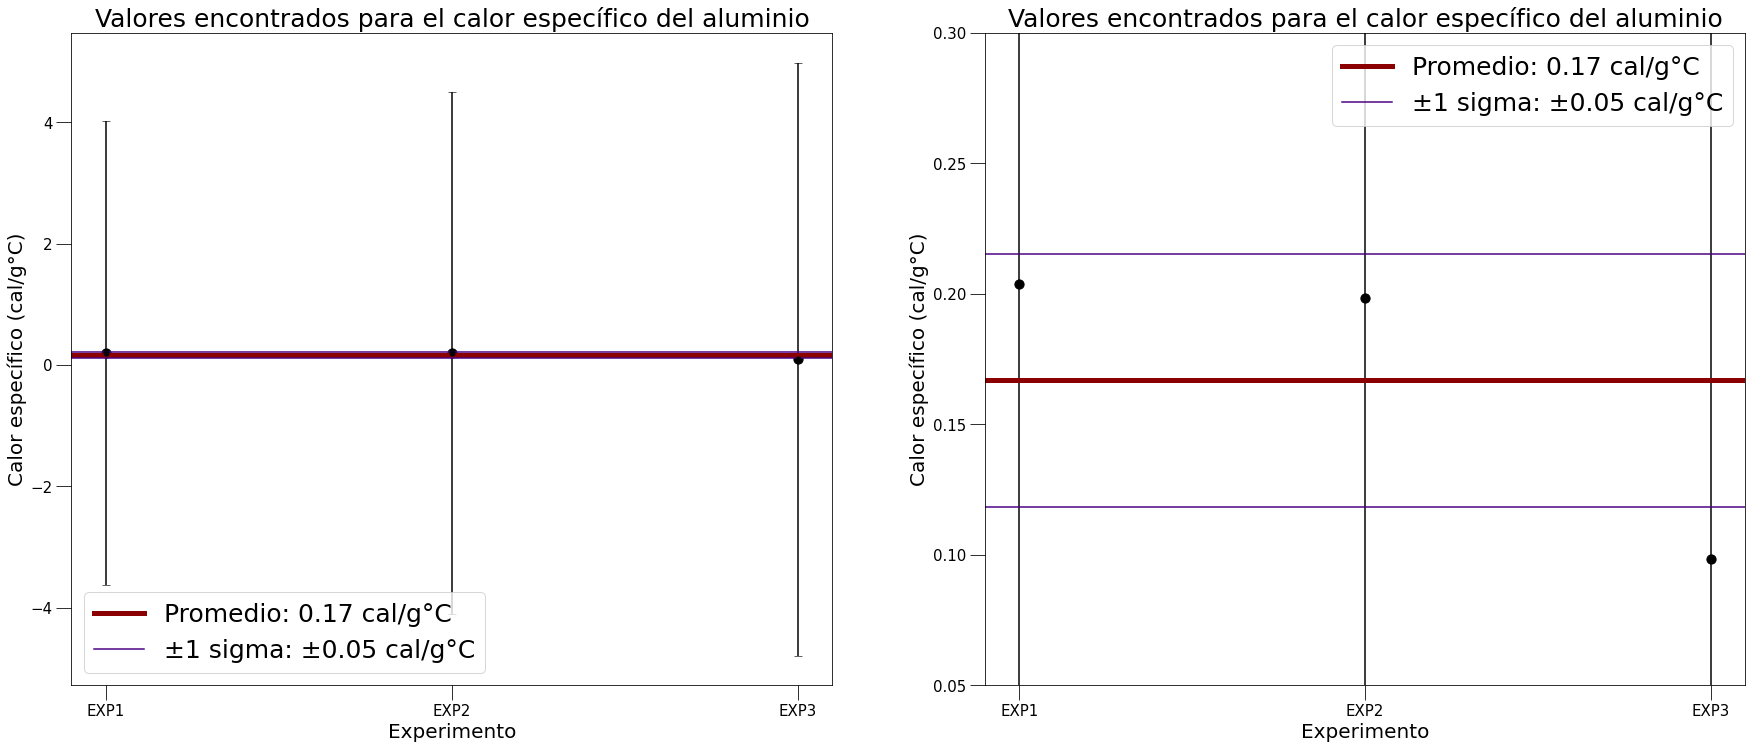

In [221]:
mean_cal = np.mean(valores_aluminio['C_AL'])
std_cal = np.std(valores_aluminio['C_AL'])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30, 12))
ax1.scatter(valores_aluminio['Resultados'], valores_aluminio['C_AL'], color='black', s=85)
ax1.errorbar(valores_aluminio['Resultados'], valores_aluminio['C_AL'], yerr = valores_aluminio['C_AL_ERR'], fmt='.',
            markersize = '10', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6)
ax1.axhline(mean_cal, color='darkred', label='Promedio: {} cal/g°C'.format(np.round(mean_cal, 2)), linewidth=5)

ax1.axhline(mean_cal + std_cal,c='indigo', label='±1 sigma: ±{} cal/g°C'.format(
    np.round(std_cal, 2)
))
ax1.axhline(mean_cal - std_cal,c='indigo')

ax1.set_title('Valores encontrados para el calor específico del aluminio', fontsize=25)
ax1.set_xlabel('Experimento', fontsize=20)
ax1.set_ylabel('Calor específico (cal/g°C)', fontsize=20)
ax1.tick_params(axis='both', labelsize=15, length=15)
ax1.legend(fontsize=25)

ax2.scatter(valores_aluminio['Resultados'], valores_aluminio['C_AL'], color='black', s=85)
ax2.errorbar(valores_aluminio['Resultados'], valores_aluminio['C_AL'], yerr = valores_aluminio['C_AL_ERR'], fmt='.',
            markersize = '10', ecolor = 'Black', color = 'Black',capsize=4, capthick=0.6)
ax2.axhline(mean_cal, color='darkred', label='Promedio: {} cal/g°C'.format(np.round(mean_cal, 2)), linewidth=5)

ax2.axhline(mean_cal + std_cal,c='indigo', label='±1 sigma: ±{} cal/g°C'.format(
    np.round(std_cal, 2)
))
ax2.axhline(mean_cal - std_cal,c='indigo')

ax2.set_ylim(0.05,0.3)
ax2.set_title('Valores encontrados para el calor específico del aluminio', fontsize=25)
ax2.set_xlabel('Experimento', fontsize=20)
ax2.set_ylabel('Calor específico (cal/g°C)', fontsize=20)
ax2.tick_params(axis='both', labelsize=15, length=15)
ax2.legend(fontsize=25)